## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy import stats
from plotly import express as px
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

today = dt.datetime.now()

## Importing the Tables

In [2]:
df = pd.read_excel('./Files/spread.xlsx', 
                   sheet_name= 'individual',
                   index_col=0)

df_month = pd.read_excel('./Files/spread.xlsx', 
                         sheet_name= '2021')

In [3]:
df

,birth_date,purchase_price,slaughter_date,slaughter_weight,slaughter_age,sale_price,breed,meds,9
ID,,,,,,,,,
1,2020-11-06,500,2021-03-14,53.75,128.0,2100.0,n,10,NaN
2,2021-02-20,600,2021-06-27,54.00,127.0,2700.0,m,10,NaN
3,2021-02-20,600,2021-07-17,56.00,149.0,2800.0,m,30,NaN
4,2021-05-07,500,NaT,NaN,NaN,NaN,t,0,NaN
5,2021-05-07,500,NaT,NaN,NaN,NaN,t,0,NaN
6,2021-06-21,500,NaT,NaN,NaN,NaN,n,10,NaN
7,2021-06-21,500,NaT,NaN,NaN,NaN,n,40,NaN
8,2021-06-21,500,NaT,NaN,NaN,NaN,n,10,NaN
9,2021-06-21,500,NaT,NaN,NaN,NaN,n,10,NaN


In [4]:
df_alive = df.loc[df.slaughter_date.isnull()].filter(
        ['ID','birth_date','purchase_price'])

df_slaughtered = df.loc[df.slaughter_date.isnull()==False]

df_alive['age'] = today - pd.to_datetime(df.birth_date)
df_alive['slaughter_estimate'] = df.birth_date + dt.timedelta(days=99) 

df_alive

,birth_date,purchase_price,age,slaughter_estimate
ID,,,,
4,2021-05-07,500,107 days 08:49:02.515627,2021-08-14
5,2021-05-07,500,107 days 08:49:02.515627,2021-08-14
6,2021-06-21,500,62 days 08:49:02.515627,2021-09-28
7,2021-06-21,500,62 days 08:49:02.515627,2021-09-28
8,2021-06-21,500,62 days 08:49:02.515627,2021-09-28
9,2021-06-21,500,62 days 08:49:02.515627,2021-09-28


In [5]:
av_age = df_alive.age.mean()
df_slaughtered

,birth_date,purchase_price,slaughter_date,slaughter_weight,slaughter_age,sale_price,breed,meds,9
ID,,,,,,,,,
1,2020-11-06,500,2021-03-14,53.75,128.0,2100.0,n,10,NaN
2,2021-02-20,600,2021-06-27,54.00,127.0,2700.0,m,10,NaN
3,2021-02-20,600,2021-07-17,56.00,149.0,2800.0,m,30,NaN


## Mass - age graph

Text(0.5, 1.0, 'Mass-Age Graph')

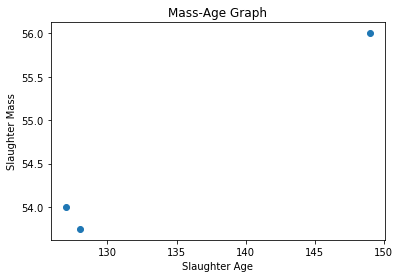

In [6]:
""" px.scatter(x=df_slaughtered.slaughter_age,
        y=df_slaughtered.slaughter_weight,
        title='Mass Against Age',
        labels={'x':'Age(days)', 'y':'Mass(Kg)'}
        ) """

""" df_slaughtered.plot(kind= 'scatter',
        x= 'slaughter_age',
        y= 'slaughter_weight') """

plt.scatter(x=df_slaughtered.slaughter_age,
        y=df_slaughtered.slaughter_weight,
        )
plt.xlabel("Slaughter Age")
plt.ylabel("Slaughter Mass")
plt.title("Mass-Age Graph")

## correlation and them


In [7]:
# correlation of age and mass

np.cov(df_slaughtered.slaughter_age, df_slaughtered.slaughter_weight)[0,1] / (np.std(df.slaughter_weight[:3], ddof=1) * np.std(df.slaughter_age[:3], ddof=1))


0.9899641382093995

In [8]:
# easier way

r, p = stats.pearsonr(
    df_slaughtered.slaughter_age[:3],
    df_slaughtered.slaughter_weight[:3]
)
corr = df_slaughtered.corr()
r # Pearson correlation coefficient

0.9899641382093992

Text(0.5, 1, 'Correlation Plot')

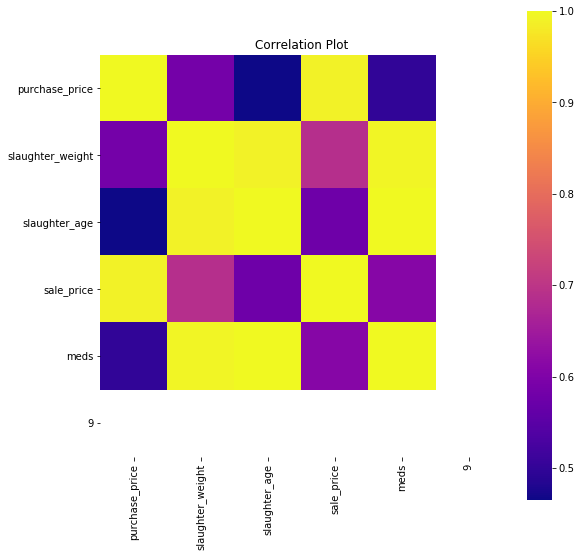

In [9]:
plt.figure(figsize=(9,9))
p = sns.heatmap(corr, square=True, cmap='plasma')
p.set_title('Correlation Plot')

## Line of best fit (regression)

/home/bayanda/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


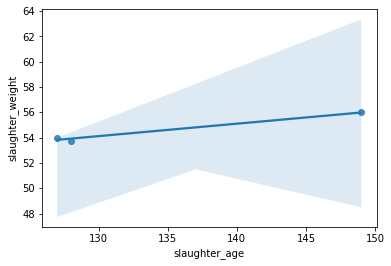

In [10]:
plt = sns.regplot(df_slaughtered.slaughter_age,df_slaughtered.slaughter_weight)

## decision tree model

In [11]:
from sklearn.tree import DecisionTreeRegressor


# Our target
y = df_slaughtered.slaughter_age

# Our features
features = ['slaughter_weight', 'meds']
X = df_slaughtered[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [12]:
# calling model
age_model = DecisionTreeRegressor(random_state=1)

# fitting data into model
age_model.fit(train_X,train_y)

DecisionTreeRegressor(random_state=1)

In [13]:
# prediction

age_prediction = age_model.predict(val_X)

In [14]:
print('prediction:\n', age_prediction)

print('real:\n',val_y)

prediction:
 [127.]
real:
 ID
1    128.0
Name: slaughter_age, dtype: float64


## random forest

In [32]:
from sklearn.ensemble import RandomForestRegressor


# Our target
y = df_slaughtered.slaughter_age

# Our features
features = ['slaughter_weight', 'meds']
X = df_slaughtered[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [33]:
# calling model
rf_age_model = RandomForestRegressor(random_state=1)

# fitting data into model
rf_age_model.fit(train_X,train_y)

RandomForestRegressor(random_state=1)

In [34]:
# prediction

rf_age_prediction = age_model.predict(val_X)

In [35]:
print('prediction:\n', rf_age_prediction)

print('real:\n',val_y)

prediction:
 [133.6]
real:
 ID
1    128.0
Name: slaughter_age, dtype: float64


## XGBoost

In [36]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(random_state=1)
xg_model.fit(train_X, train_y)

xg_age_prediction = xg_model.predict(val_X)


print('prediction:\n', xg_age_prediction)

print('real:\n',val_y)


prediction:
 [127.0009]
real:
 ID
1    128.0
Name: slaughter_age, dtype: float64
